##  Bag of words implementation

It is a way to extract or derive  numerical features from text data so as to make modelling feasible in case of text dataset.

In simple words, 

A quite common feature extraction method or technique for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram or frequency of the words within the text, i.e. considering each word count as a feature.

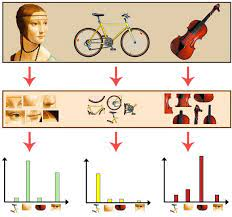


Source: Towards Data Science

In [5]:
eco_para = """ 
Microeconomics examines how entities, forming a market structure, interact within a market to create a market system. These entities include private and public players with various classifications, typically operating under scarcity of tradable units and light government regulation.[clarification needed] The item traded may be a tangible product such as apples or a service such as repair services, legal counsel, or entertainment.

In theory, in a free market the aggregates (sum of) of quantity demanded by buyers and quantity supplied by sellers may reach economic equilibrium over time in reaction to price changes; in practice, various issues may prevent equilibrium, and any equilibrium reached may not necessarily be morally equitable. For example, if the supply of healthcare services is limited by external factors, the equilibrium price may be unaffordable for many who desire it but cannot pay for it.

Various market structures exist. In perfectly competitive markets, no participants are large enough to have the market power to set the price of a homogeneous product. In other words, every participant is a "price taker" as no participant influences the price of a product. In the real world, markets often experience imperfect competition.

Forms include monopoly (in which there is only one seller of a good), duopoly (in which there are only two sellers of a good), oligopoly (in which there are few sellers of a good), monopolistic competition (in which there are many sellers producing highly differentiated goods), monopsony (in which there is only one buyer of a good), and oligopsony (in which there are few buyers of a good). Unlike perfect competition, imperfect competition invariably means market power is unequally distributed. Firms under imperfect competition have the potential to be "price makers", which means that, by holding a disproportionately high share of market power, they can influence the prices of their products.

Microeconomics studies individual markets by simplifying the economic system by assuming that activity in the market being analysed does not affect other markets. This method of analysis is known as partial-equilibrium analysis (supply and demand). This method aggregates (the sum of all activity) in only one market. General-equilibrium theory studies various markets and their behaviour. It aggregates (the sum of all activity) across all markets. This method studies both changes in markets and their interactions leading towards equilibrium."""

In [9]:
# print it
print(eco_para)

 
Microeconomics examines how entities, forming a market structure, interact within a market to create a market system. These entities include private and public players with various classifications, typically operating under scarcity of tradable units and light government regulation.[clarification needed] The item traded may be a tangible product such as apples or a service such as repair services, legal counsel, or entertainment.

In theory, in a free market the aggregates (sum of) of quantity demanded by buyers and quantity supplied by sellers may reach economic equilibrium over time in reaction to price changes; in practice, various issues may prevent equilibrium, and any equilibrium reached may not necessarily be morally equitable. For example, if the supply of healthcare services is limited by external factors, the equilibrium price may be unaffordable for many who desire it but cannot pay for it.

Various market structures exist. In perfectly competitive markets, no participants

In [39]:
# importing libraries
import nltk # which we will use for working with text data
import re  # it is working for replace , lowing regex expression
from nltk.stem.porter import PorterStemmer # stemming
from nltk.stem import WordNetLemmatizer #lemmatizer
from nltk.corpus import stopwords #getting the stopwords
# download all the resources needed for the analysis
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
# initilaizing the things 
port_stem = PorterStemmer()
word_lem = WordNetLemmatizer()

In [12]:
# getting the sentence  from the paragraph using sent_tokenize which helps in bringing the entire paragraph into tokens of sentences.
sent = nltk.sent_tokenize(eco_para)
# it is a list of sentences

In [13]:
# number of sentences
len(sent)

18

## Cleaning the paragraph and getting the bag of words

We will be using the re module and other imported functions and formuals to get the cleaned text and a bag of words . To do so, we will define a function that does the work for us.

### defining the function

In [40]:
# function define
def corpus_words(sentences):
  """ It will clean and convert the sentences into
  a corpus common and non-stopwords"""
  corpus =[]
  for i in range(len(sentences)):
    # replace the non-important thing other than a-z A-Z
    review = re.sub('[^a-zA-Z]',' ',sentences[i])
    # lower case
    review  = review.lower()
    # splitting it
    review = review.split()
    # getting rid of stopwords and then lemmatize them
    review =[word_lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = " ".join(review)
    # adding to the corpus
    corpus.append(review)
  return corpus


In [45]:
# using the defined function
corp = corpus_words(sent)


In [46]:
# printing it
corp

['microeconomics examines entity forming market structure interact within market create market system',
 'entity include private public player various classification typically operating scarcity tradable unit light government regulation',
 'clarification needed item traded may tangible product apple service repair service legal counsel entertainment',
 'theory free market aggregate sum quantity demanded buyer quantity supplied seller may reach economic equilibrium time reaction price change practice various issue may prevent equilibrium equilibrium reached may necessarily morally equitable',
 'example supply healthcare service limited external factor equilibrium price may unaffordable many desire cannot pay',
 'various market structure exist',
 'perfectly competitive market participant large enough market power set price homogeneous product',
 'word every participant price taker participant influence price product',
 'real world market often experience imperfect competition',
 'form in

## Using Count Vectorizer

Now,we will be using [count vectorize](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) of sklearn  to create a bag of words like vector matrix.

* Note we can do the previous procesing with the help of count vectorize with the use of its different parameters, but it is always good to do it on your own.

In [49]:
# using sklearn feature extraction
from sklearn.feature_extraction.text import CountVectorizer
# intializing it
cv = CountVectorizer()
# getting a vector array
X_arr = cv.fit_transform(corp).toarray

In [50]:
# look at it
X_arr

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
# look at the dimension
print("There are {} number of sentences with {} common words in the corpus".format(X_arr.shape[0],X_arr.shape[1]))

There are 18 number of sentences with 134 common words in the corpus
